# SVM example

In [30]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (8.0, 8.0), 'font.size': 10})
import numpy as np
from sklearn import svm, datasets
from numpy.random import randn

def plot2dfun(f, limits, resolution, ax=None):
    if ax is None:
        ax = plt
    xmin, xmax, ymin, ymax = limits
    ylim = np.arange(ymin, ymax, (ymax - ymin) / float(resolution))
    xlim = np.arange(xmin, xmax, (xmax - xmin) / float(resolution))
    a, b = np.meshgrid(xlim, ylim)
    img = f(np.vstack([np.ravel(a), np.ravel(b)]).T)
    img = img.reshape(a.shape+img.shape[1:])
    ax.imshow(img[::-1], cmap='gray', aspect='auto', extent=(xmin, xmax, ymin, ymax))
    plt.xlabel('$x_1$', fontsize=16)
    plt.ylabel('$x_2$', fontsize=16)
    return a, b, img

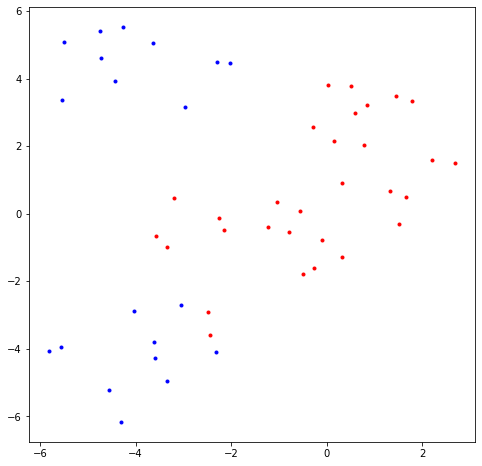

In [65]:
# Create some training data for two classes
n = 10 # Controls the amount of the training data
x1 = np.r_[randn(n, 2) + np.array([1, 3]),
           randn(n, 2) + np.array([-2, -2]),
           randn(n, 2) + np.array([0, 0])]


x2 = randn(n, 2) + np.array([-4, 4]) # Linearly separable problem

# Uncomment the following lines to make the problem "more difficult"
x2 = np.r_[x2, randn(n, 2) + np.array([-4, -4])]
#x2 = np.r_[x2, randn(n, 2) + np.array([2, -2]), randn(n, 2) + np.array([4, 4])]


t1 = np.ones(len(x1))
t2 = np.zeros(len(x2))

X = np.r_[x1, x2]
Y = np.r_[t1, t2]

plt.plot(*x1.T, 'r.', *x2.T, 'b.')
ax = plt.axis()

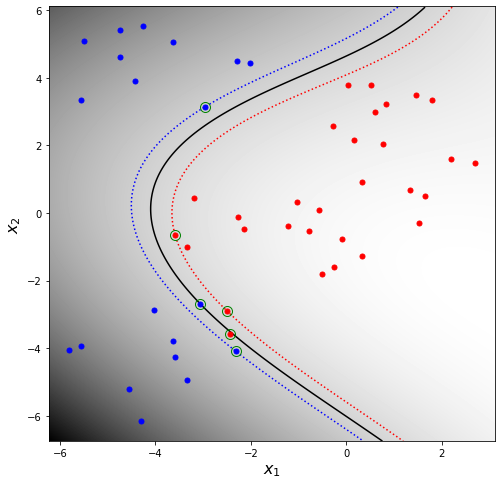

In [66]:
C = 1e1 # SVM regularization parameter (lower C => more regularization)

# train SVM using a chosen kernel
#clf = svm.SVC(kernel='linear',                   C=C).fit(X, Y)
#clf = svm.SVC(kernel='rbf',  gamma=0.7,         C=C).fit(X, Y)
clf = svm.SVC(kernel='poly', degree=3, coef0=1, C=C).fit(X, Y)

# plot decision function y as grayscale immage
xx, yy, zz = plot2dfun(lambda x: clf.decision_function(x), ax, 500)

#plot training data
plt.plot(*x1.T, 'r.', *x2.T, 'b.', markersize=10)

# plot decision boundary (y=0) and margin boundaries (y=1 amd y=-1)
plt.contour(xx, yy, zz, [-1, 0, 1], colors=['b','k','r'], linestyles=['dotted','solid','dotted'])

# show support vectors in green circles
plt.plot(*X[clf.support_].T, 'go', markersize=10, fillstyle='none')
plt.show()
